In [3]:
#!pip install highway_env
#!pip install highway-env


Action Space: Box(-1.0, 1.0, (2,), float32)
Observation Space: Box(-inf, inf, (5, 4), float32)


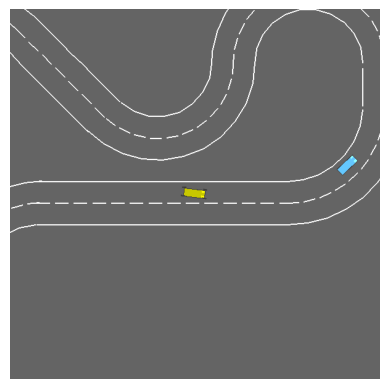

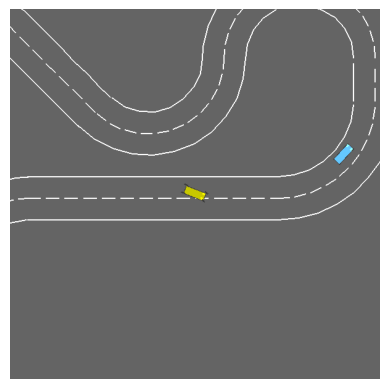

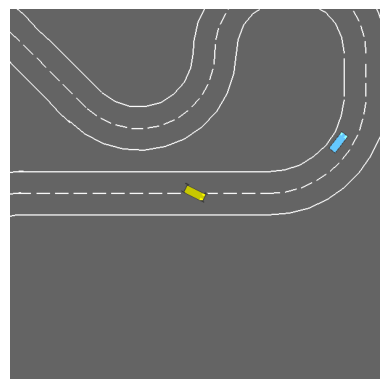

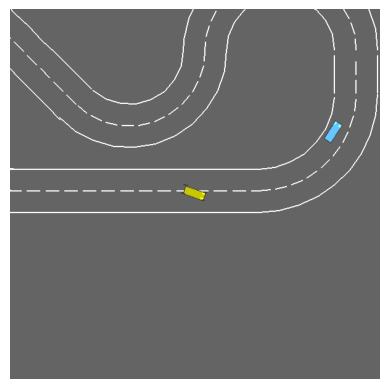

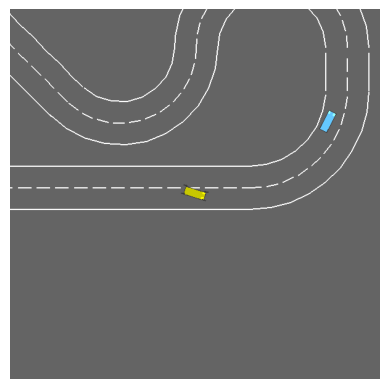

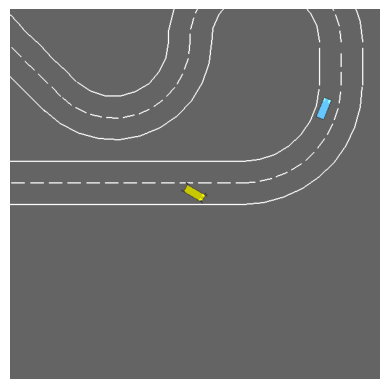

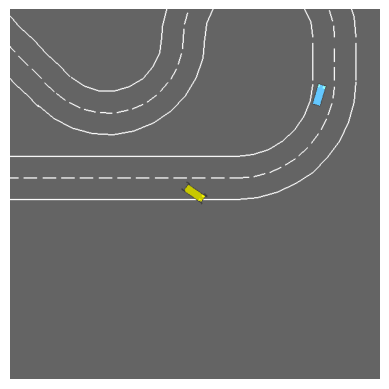

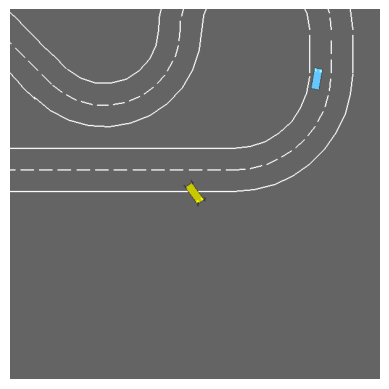

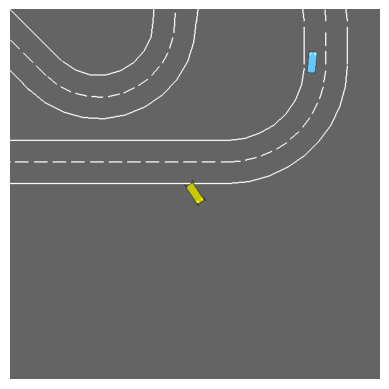

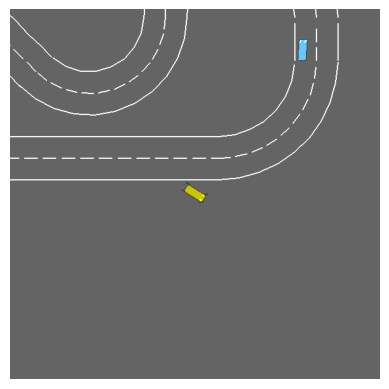

In [4]:
import pickle
import highway_env
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

config_dict = {
    "observation": {
        "type": "Kinematics",  # Set to Kinematics to use kinematic-based observation
        "features": ['x', 'y', 'vx', 'vy'],  # Use only position and velocity features
        "as_image": False,  # If you prefer the observation as a vector, not an image
        "align_to_vehicle_axes": True  # Align observation to vehicle's local axes
    },
    "action": {
        "type": "ContinuousAction",  # Enable continuous action space
        "longitudinal": True,  # Enable longitudinal control (acceleration)
        "lateral": True        # Enable lateral control (steering)
    },
    "simulation_frequency": 16,  # Hz
    "policy_frequency": 4,  # Hz
    "duration": 60,  # Duration of the simulation in seconds
    "collision_reward": -1,  # Reward for collision
    "lane_centering_cost": 4,  # Cost for not staying centered in the lane
    "action_reward": -0.3,  # Penalty for each action taken
    "controlled_vehicles": 1,  # Number of vehicles controlled by the agent
    "other_vehicles": 1,  # Number of other vehicles
    "screen_width": 600,  # Width of the screen for visualization
    "screen_height": 600,  # Height of the screen for visualization
    "centering_position": [0.5, 0.5],  # Position of the vehicle in the screen
    "scaling": 7,  # Scaling factor for rendering
    "show_trajectories": False,  # Whether to show trajectories of vehicles
    "render_agent": True,  # Whether to render the agent's vehicle
    "offscreen_rendering": False  # Whether to render offscreen
}

# Save the config to a file
with open("config.pkl", "wb") as f:
    pickle.dump(config_dict, f)

# Create and configure the environment
env = gym.make("racetrack-v0", render_mode="rgb_array")
env.unwrapped.configure(config_dict)

# Reset the environment to apply the config
env.reset()

# Check the action and observation spaces
actions = env.action_space
states = env.observation_space

# Print action and observation spaces
print("Action Space:", actions)
print("Observation Space:", states)

for _ in range(10):  # Loop for 200 time steps
    # Take a random action (replace with your agent's policy if needed)
    action = env.action_space.sample()

    # Step the environment with the chosen action
    state, reward, done, _, info = env.step(action)

    # Render the environment
    frame = env.render()  # Get the current rendered frame

    # Display the frame
    plt.imshow(frame)
    plt.axis('off')  # Hide axes
    plt.show()

    if done:
        break

# Close the environment
env.close()

Action Space: Discrete(5)
Observation Space: Box(-inf, inf, (5, 4), float32)
crashFalse
overFalse


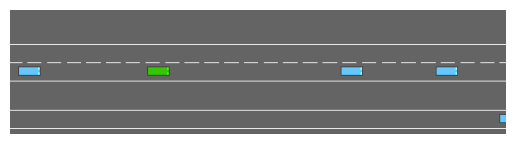

crashFalse
overFalse


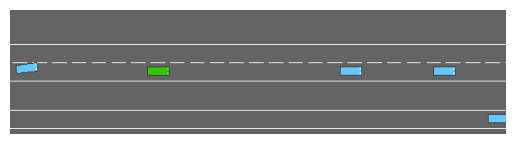

crashFalse
overFalse


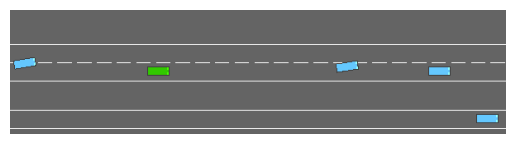

crashFalse
overFalse


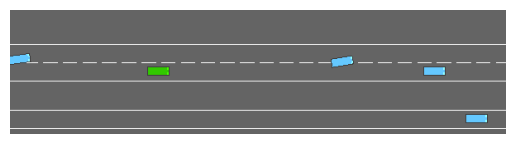

crashFalse
overFalse


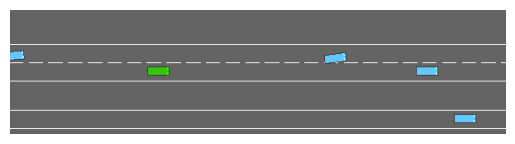

crashFalse
overFalse


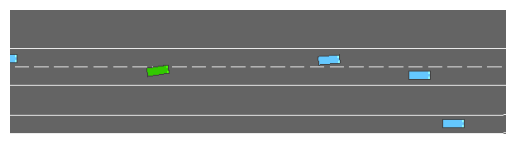

crashFalse
overFalse


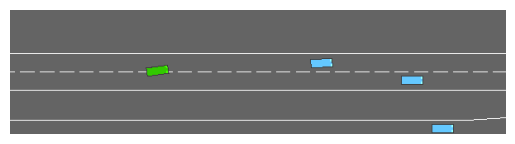

crashFalse
overFalse


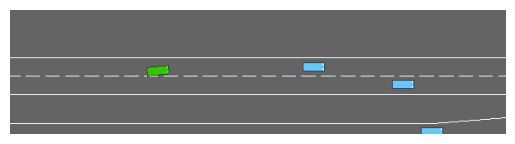

crashFalse
overFalse


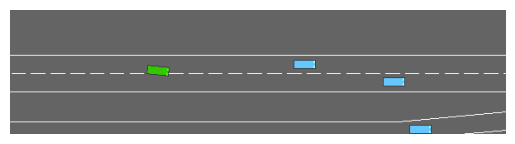

crashFalse
overFalse


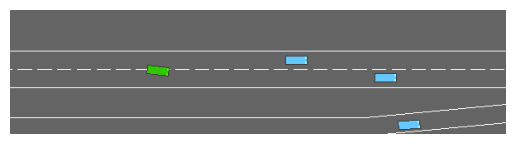

crashFalse
overFalse


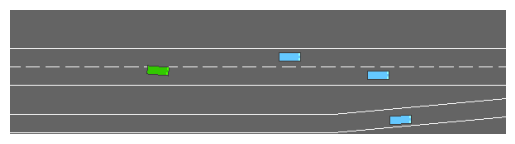

crashFalse
overFalse


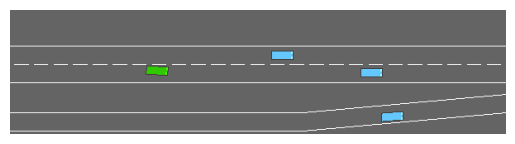

crashFalse
overFalse


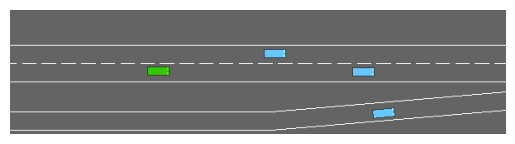

crashFalse
overFalse


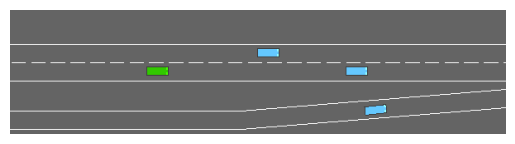

crashFalse
overFalse


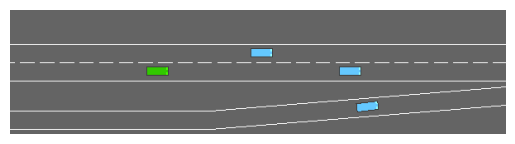

crashFalse
overFalse


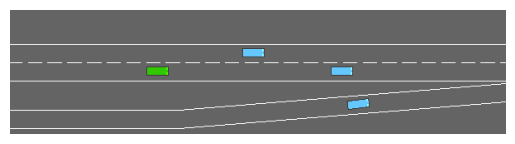

crashFalse
overFalse


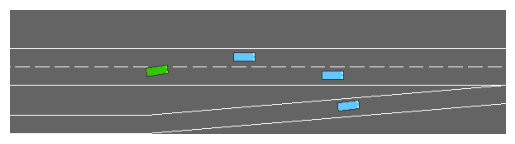

crashFalse
overFalse


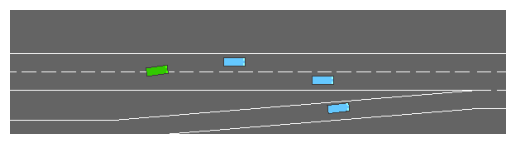

crashFalse
overFalse


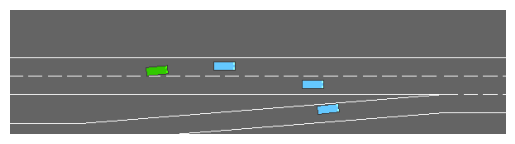

crashFalse
overFalse


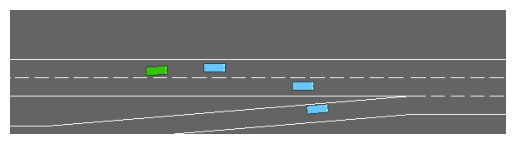

crashFalse
overFalse


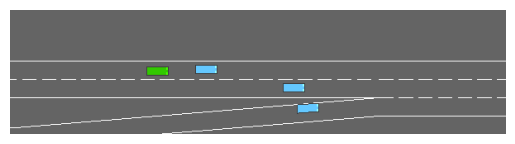

crashFalse
overFalse


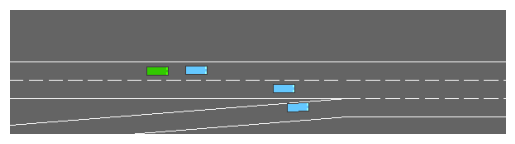

crashFalse
overFalse


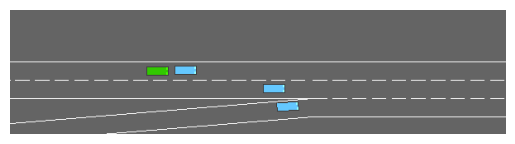

crashTrue
overFalse


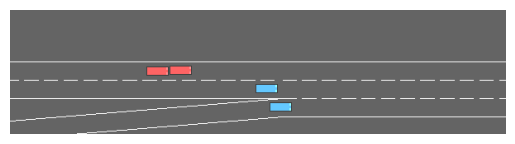

In [5]:
import pickle
import gymnasium as gym
import matplotlib.pyplot as plt

# Define configuration for merge-v0 using kinematics observations
config_dict = {
    "observation": {
        "type": "Kinematics",                # Use kinematic-based observation
        "features": ['x', 'y', 'vx', 'vy'],    # Position and velocity features
        "as_image": False,                   # Return observation as vector (not as image)
        "align_to_vehicle_axes": True        # Align observation with vehicle's axes
    },
    "action": {
        "type": "DiscreteMetaAction",        # Use discrete meta actions
        "longitudinal": True,                # Enable throttle control
        "lateral": True                      # Enable steering control
    },
    "simulation_frequency": 16,            # Simulation frequency in Hz
    "policy_frequency": 4,                 # Policy frequency in Hz
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "screen_width": 600,                   # Width of the screen for rendering
    "screen_height": 150,                  # Height of the screen for rendering
    "centering_position": [0.3, 0.5],        # Agent centering on screen
    "scaling": 5.5,                        # Zoom factor for rendering
    "show_trajectories": False,            # Do not show trajectories
    "render_agent": True,                  # Render the agent vehicle
    "offscreen_rendering": False,          # Render on screen (not offscreen)
    "lane_change_reward": 0,               # Lane change reward setting
}

# Save the config to a file (optional)
with open("config.pkl", "wb") as f:
    pickle.dump(config_dict, f)

# Create and configure the merge environment with render_mode "rgb_array"
env = gym.make("merge-v0", render_mode="rgb_array")
env.unwrapped.configure(config_dict)

# Reset the environment to apply the configuration
env.reset()

# Print action and observation spaces for debugging
print("Action Space:", env.action_space)
print("Observation Space:", env.observation_space)

# Run the simulation for a few steps and display each rendered frame inline
for _ in range(30):
    action = env.action_space.sample()  # Sample a random action
    observation, reward, done, truncated, info = env.step(action)

    # Get the current rendered frame as an RGB array
    frame = env.render()

    # Display the image using matplotlib
    plt.imshow(frame)
    plt.axis("off")
    plt.show()

    if done or truncated:
        break

env.close()
